In [ ]:
import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

In [ ]:
# Model configuration
batch_size = 50
img_width, img_height, img_num_channels = 32, 32, 3
loss_function = "sparse_categorical_crossentropy"
no_classes = 100
no_epochs = 10
optimizer = "adam"
validation_split = 0.2
verbosity = 1

In [ ]:
# Load CIFAR-100 data
(input_train, target_train), (input_test, target_test) = cifar100.load_data()

In [ ]:
# Determine shape of the data
input_shape = (img_width, img_height, img_num_channels)

In [ ]:
# Parse numbers as floats
input_train = input_train.astype('float32')
input_test = input_test.astype('float32')

In [ ]:
# Normalize data
input_train = input_train / 255
input_test = input_test / 255

In [ ]:
# Create the model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(no_classes, activation='softmax'))

In [ ]:
# Compile the model
model.compile(loss=loss_function,
              optimizer=optimizer,
              metrics=['accuracy'])

In [ ]:
# Fit data to model
history = model.fit(input_train, target_train,
            batch_size=batch_size,
            epochs=no_epochs,
            verbose=verbosity,
            validation_split=validation_split)

Epoch 1/10
800/800 [==============================] - 64s 78ms/step - loss: 4.0765 - accuracy: 0.0708 - val_loss: 3.7730 - val_accuracy: 0.1192
Epoch 2/10
800/800 [==============================] - 60s 75ms/step - loss: 3.4817 - accuracy: 0.1653 - val_loss: 3.3312 - val_accuracy: 0.1898
Epoch 3/10
800/800 [==============================] - 61s 77ms/step - loss: 3.1577 - accuracy: 0.2234 - val_loss: 3.0938 - val_accuracy: 0.2405
Epoch 4/10
800/800 [==============================] - 62s 78ms/step - loss: 2.9430 - accuracy: 0.2648 - val_loss: 3.0117 - val_accuracy: 0.2449
Epoch 5/10
800/800 [==============================] - 60s 76ms/step - loss: 2.7806 - accuracy: 0.2943 - val_loss: 2.8496 - val_accuracy: 0.2864
Epoch 6/10
800/800 [==============================] - 59s 74ms/step - loss: 2.6371 - accuracy: 0.3244 - val_loss: 2.8184 - val_accuracy: 0.2938
Epoch 7/10
800/800 [==============================] - 61s 77ms/step - loss: 2.5046 - accuracy: 0.3534 - val_loss: 2.7326 - val_accuracy:

In [ ]:
model.evaluate(input_test,target_test)

313/313 [==============================] - 5s 15ms/step - loss: 2.6825 - accuracy: 0.3378


[2.6824989318847656, 0.337799996137619]

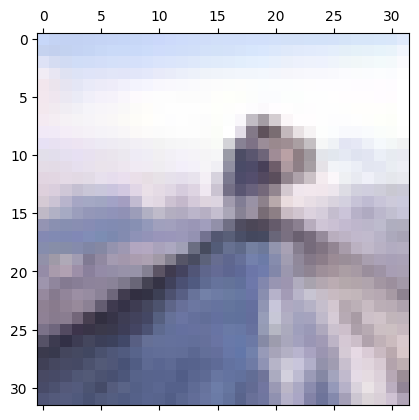

In [ ]:
plt.matshow(input_test[0])

In [ ]:
yp=model.predict(input_test)

313/313 [==============================] - 5s 14ms/step


In [ ]:
np.argmax(yp[0])

72

In [ ]:
class_labels = ["Beaver","Dolphin","Otter","Seal	Whale","Aquarium fish","Flatfish","Ray","Shark	Trout","Orchids","Poppies","Roses","Sunflowers","Tulips"
"Bottles","Bowls","Cans","Cups","Plates","Apples","Mushrooms","Oranges","Pears","Sweet peppers","Clok","Computer","keyboard","Lamp","Telephone","Television","Bed"
"Chair","Couch","Table","Wardrobe","Bee","Beetle","Butterfly","Caterpillar","Cockroach","Bear","Leopard","Lion","Tiger","Wolf","Bridge","Castle","House","Road","Skyscraper",
"Cloud","Forest","Mountain","Plain	Sea","Camel","Cattle","Chimpanzee","Elephant","Kangaroo","Fox","Porcupine","Possum","Raccoon","Skunk","Crab","Lobster","Snail","Spider","Worm",
"Baby","Boy","Girl","Man","Woman","Crocodile","Dinosaur","Lizard","Snake","Turtle","Hamster","Mouse","Rabbit","Shrew","Squirrel","Maple","Oak","Palm","Pine","Willow"
"Bicycle","Bus","Motorcycle","Pickup","truck","Train","Lawn-mower","Rocket","Streetcar","Tank","Tractor"]

In [ ]:
class_labels[np.argmax(yp[0])]

'Dinosaur'